In [0]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.7MB/s 
     |████████████████████████████████| 174kB 42.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/0e/2b/e8/c0b818ac4b3d35104d35e48cdc7afe27fc06ea277feed2831a
Successfully built JPype1


In [0]:
import pandas as pd
df1=pd.read_csv('Pre2014_1.csv')
df2=pd.read_csv('Pre2014_2.csv')
df3=pd.read_csv('Pre2015.csv')
df4=pd.read_csv('Pre2016.csv')
df5=pd.read_csv('Pre2017.csv')
df6=pd.read_csv('Pre2018.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6])

p_tokens = df.preprocessing

In [0]:
list = []
x = []

for i in p_tokens:
  w2v_wordlist = str(i).split(',')
  list.append(w2v_wordlist)


#Word2Vec

In [0]:
from gensim.models import Word2Vec

word2vec = Word2Vec(
    sentences = list,           # 학습시킬 문장
    size = 30,                  # 임베딩된 단어 벡터의 차원 크기
    alpha = 0.025,               # 학습률(Learning rate)
    min_count=2,                 # 2번 미만 등장한 단어는 제외
    window = 8,                  # 문맥의 크기 (window_size)
    sample = 0.001,              # sub-sampling
    sg = 1,                      # 0: CBOW, 1: Skip-gram
    iter = 10                    # 전체 문장 반복학습 횟수(epoch)
    )

In [0]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("KoreanAir_model")
word2vec.save("KoreanAir_model")
word2vec = Word2Vec.load("KoreanAir_model")

In [0]:
word2vec.wv.__getitem__('대한항공')

array([-0.1271243 ,  0.19507316, -0.06738917, -0.35945803, -0.08351244,
        0.0190654 , -0.24331576,  0.49359566, -0.0703044 , -0.4468411 ,
       -0.2686094 ,  0.23978129, -0.06779455, -0.31615743, -0.2557539 ,
        0.08851413, -0.21875922,  0.13554147,  0.13019702,  0.20886044,
       -0.10669082, -0.3010479 , -0.02524824,  0.16824411,  0.10171667,
        0.21216002, -0.27805978, -0.36570328, -0.3584531 ,  0.19326396],
      dtype=float32)

In [0]:
word2vec.wv.most_similar('탑승')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('비상구', 0.7211501002311707),
 ('거부', 0.6985023617744446),
 ('승객', 0.6973533630371094),
 ('카운터', 0.6766371130943298),
 ('프레스티지', 0.6697472333908081),
 ('대기', 0.6671643257141113),
 ('탑승객', 0.6573629975318909),
 ('알레르기', 0.6568126678466797),
 ('부부싸움', 0.6551146507263184),
 ('시행', 0.6545869708061218)]

In [0]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=20)]
                  for search_term in ['땅콩']}
similar_words

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


{'땅콩': ['회항',
  '회황',
  '조현아',
  '부사',
  '리턴',
  '사태',
  '파문',
  '사건',
  '누리꾼',
  '봉지',
  '견과류',
  '비극',
  '일파',
  '분노',
  '실형',
  '비난',
  '사무장',
  '공판',
  '램프',
  '전말']}

In [0]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [0]:
# 기본 글꼴 변경
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

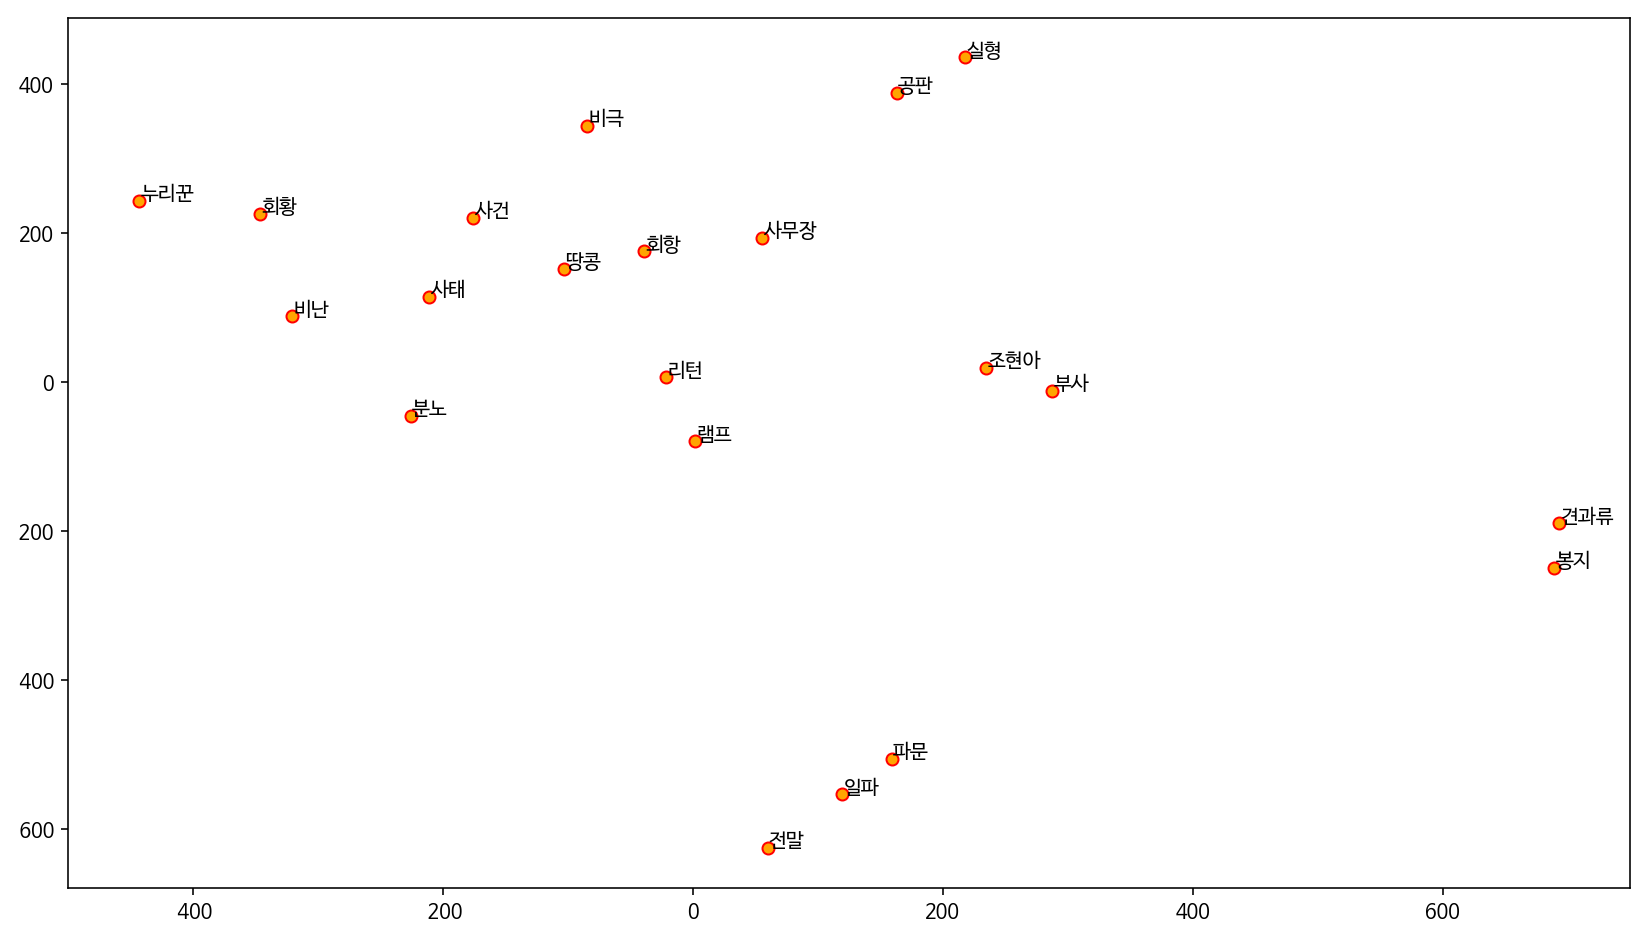

In [0]:
from sklearn.manifold import TSNE
import numpy as np

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2) #원래 perplexity=2
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# doc2vec 모델 학습 후 저장

In [0]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [0]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list)]

doc_model = Doc2Vec(
            documents, 
            vector_size=150,
            window=8,
            min_count=1,
            workers=4
            )

In [0]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile("KoreanAir_doc2vec_model")
doc_model.save("KoreanAir_doc2vec_model")
doc_model = Doc2Vec.load("KoreanAir_doc2vec_model")